In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
with open("C://Data//hislight_pickles//restricted_dark.pickle", 'rb') as handle:
    PVH = pickle.load(handle)

with open("C://Data//hislight_pickles//HL3_restricted_dark.pickle", 'rb') as handle:
    VMH = pickle.load(handle)    

In [9]:
PVH_list_of_mice = []
VMH_list_of_mice = []

mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL303", "HL304"]
#HL313 - HL318 are control mice
#HL303, HL304 have artifacts but are otherwise fine


for key, val in PVH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in PVH_list_of_mice:
            PVH_list_of_mice.append(val["mouse_ID"])
        
for key, val in VMH.items():
    if val["mouse_ID"] not in mice_to_exclude:
        if val["mouse_ID"] not in VMH_list_of_mice:
            VMH_list_of_mice.append(val["mouse_ID"])

In [10]:
PVH_snips_mean_start= []
PVH_snips_mean_end = []
PVH_snips_mean_full = []

kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

pre = 5
post = 10
mineventlength=10
binlength=0.1

for mouse in PVH_list_of_mice:
    snips_start = []
    snips_end = []
    snips_full = []
    
    for key, val in PVH.items():
        if val["mouse_ID"]==mouse:
            lickdata= tp.lickCalc(val["licks"], minrunlength=3)

            snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
            snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

            snipper = tp.Snipper(val["corrected"],
                                    lickdata["rStart"],
                                    end=lickdata["rEnd"],
                                    fs=val["fs"],
                                    pre=pre,
                                    post=post,
                                    binlength=binlength,
                                    zscore=True
                                    )

            snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
            snips_full.append(snipper.snips)

            #run_length = tp.flatten_list(run_length)
            #run_licks = tp.flatten_list(run_licks)

    snips_start = np.vstack(snips_start)
    snips_end = np.vstack(snips_end)
    snips_full = np.vstack(snips_full)

    PVH_snips_mean_start.append(np.mean(snips_start, axis=0))
    PVH_snips_mean_end.append(np.mean(snips_end, axis=0))
    PVH_snips_mean_full.append(np.mean(snips_full, axis=0))
    
PVH_snips_mean_full = np.array(PVH_snips_mean_full)

In [11]:
VMH_snips_mean_start= []
VMH_snips_mean_end = []
VMH_snips_mean_full = []

kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

pre = 5
post = 10
mineventlength=10
binlength=0.1

for mouse in VMH_list_of_mice:
    snips_start = []
    snips_end = []
    snips_full = []
    
    for key, val in VMH.items():
        if val["mouse_ID"]==mouse:
            lickdata= tp.lickCalc(val["licks"], minrunlength=3)

            snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
            snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

            snipper = tp.Snipper(val["corrected"],
                                    lickdata["rStart"],
                                    end=lickdata["rEnd"],
                                    fs=val["fs"],
                                    pre=pre,
                                    post=post,
                                    binlength=binlength,
                                    zscore=True
                                    )

            snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
            snips_full.append(snipper.snips)

            #run_length = tp.flatten_list(run_length)
            #run_licks = tp.flatten_list(run_licks)

    snips_start = np.vstack(snips_start)
    snips_end = np.vstack(snips_end)
    snips_full = np.vstack(snips_full)

    VMH_snips_mean_start.append(np.mean(snips_start, axis=0))
    VMH_snips_mean_end.append(np.mean(snips_end, axis=0))
    VMH_snips_mean_full.append(np.mean(snips_full, axis=0))
    
VMH_snips_mean_full = np.array(VMH_snips_mean_full)

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


In [21]:
colors_PVH = "#219C90"
colors_VMH  = "#90219c"

colors = ["#219C90", "#90219c"]

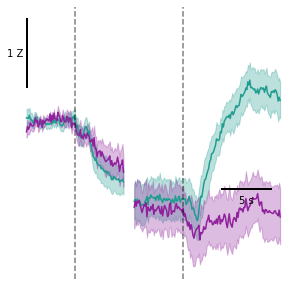

In [22]:
f, ax =plt.subplots(figsize=[5,5])

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

#PVH
x1_PVH = np.arange(0,bins_early)
x2_PVH= np.arange(PVH_snips_mean_full.shape[1] - bins_late, PVH_snips_mean_full.shape[1])

mean_PVH = np.mean(PVH_snips_mean_full, axis=0)
error_values_PVH = np.std(PVH_snips_mean_full, axis=0) / np.sqrt(len(PVH_snips_mean_full))

ax.plot(x1_PVH, mean_PVH[:bins_early], color=colors_PVH)
ax.plot(x2_PVH, mean_PVH[-bins_late:], color=colors_PVH)

ax.fill_between(x1_PVH, mean_PVH[:bins_early]-error_values_PVH[:bins_early], 
                mean_PVH[:bins_early]+error_values_PVH[:bins_early], 
                color=colors_PVH, alpha=0.3)
ax.fill_between(x2_PVH, mean_PVH[-bins_late:]-error_values_PVH[-bins_late:], 
                mean_PVH[-bins_late:]+error_values_PVH[-bins_late:], 
                color=colors_PVH, alpha=0.3)

#VMH
x1_VMH = np.arange(0,bins_early)
x2_VMH= np.arange(VMH_snips_mean_full.shape[1] - bins_late, VMH_snips_mean_full.shape[1])

mean_VMH = np.mean(VMH_snips_mean_full, axis=0)
error_values_VMH = np.std(VMH_snips_mean_full, axis=0) / np.sqrt(len(VMH_snips_mean_full))

ax.plot(x1_VMH, mean_VMH[:bins_early], color=colors_VMH)
ax.plot(x2_VMH, mean_VMH[-bins_late:], color=colors_VMH)

ax.fill_between(x1_VMH, mean_VMH[:bins_early]-error_values_VMH[:bins_early], 
                mean_VMH[:bins_early]+error_values_VMH[:bins_early], 
                color=colors_VMH, alpha=0.3)
ax.fill_between(x2_VMH, mean_VMH[-bins_late:]-error_values_VMH[-bins_late:], 
                mean_VMH[-bins_late:]+error_values_VMH[-bins_late:], 
                color=colors_VMH, alpha=0.3)


for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)


f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\PVH_vs_VMH_restricted.pdf")

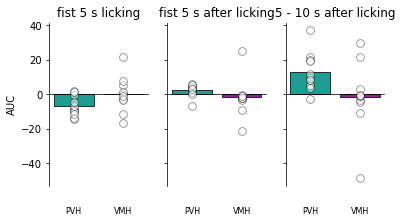

In [25]:
f, [ax1, ax2, ax3] =plt.subplots(ncols=3,
                            figsize=[6,3],
                            sharey= True,
                            gridspec_kw={"wspace":0.2})

tp.barscatter([np.trapz(np.array(PVH_snips_mean_start)[:,50:100]),
               np.trapz(np.array(VMH_snips_mean_start)[:,50:100])],
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["PVH", "VMH"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax1)

tp.barscatter([np.trapz(np.array(PVH_snips_mean_end)[:,50:100]),
               np.trapz(np.array(VMH_snips_mean_end)[:,50:100])],
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["PVH", "VMH"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax2)

tp.barscatter([np.trapz(np.array(PVH_snips_mean_end)[:,100:]),
               np.trapz(np.array(VMH_snips_mean_end)[:,100:])],
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["PVH", "VMH"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax3)

ax1.set_ylabel("AUC")
ax1.set_title("fist 5 s licking")
ax2.set_title("fist 5 s after licking")
ax3.set_title("5 - 10 s after licking")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\PVH_vs_VMH_AUC.pdf")

(<AxesSubplot:>,
 [1, 2, 3, 4],
 [<BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>,
  <BarContainer object of 1 artists>],
  <matplotlib.collections.PathCollection at 0x225f38829a0>])

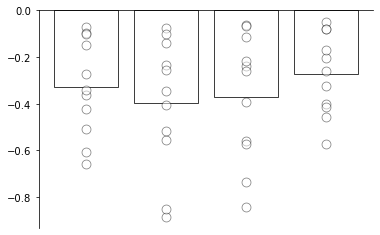

In [169]:
restricted_min_start= []
light_min_start= []
dark_min_start= []
sucralose_min_start= []

for snip in restricted_snips_mean_start:
    restricted_min_start.append(np.min(snip)) 
    
for snip in light_snips_mean_start:
    light_min_start.append(np.min(snip)) 
    
for snip in dark_snips_mean_start:
    dark_min_start.append(np.min(snip)) 
    
for snip in sucralose_snips_mean_start:
    sucralose_min_start.append(np.min(snip)) 
    
tp.barscatter([restricted_min_start, light_min_start, dark_min_start, sucralose_min_start] )  

In [167]:
restricted_min

[-0.5084407371203659,
 -0.36219030673165714,
 -0.0730815495768999,
 -0.4242191282693648,
 -0.6587158331982538,
 -0.09875609844155125,
 -0.33948346622287345,
 -0.2709053563934905,
 -0.6082468217804128,
 -0.10322066971342178,
 -0.1479603627248506]

Text(0, 0.5, 'AUC')

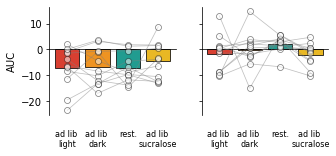

In [152]:
f, [ax1, ax2] =plt.subplots(ncols=2,
                            figsize=[5,2],
                            sharey= True,
                            gridspec_kw={"wspace":0.2})

tp.barscatter([np.trapz(np.array(light_snips_mean_start)[:,50:100]),
               np.trapz(np.array(dark_snips_mean_start)[:,50:100]),
               np.trapz(np.array(restricted_snips_mean_start)[:,50:100]),
               np.trapz(np.array(sucralose_snips_mean_start)[:,50:100])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax1)

tp.barscatter([np.trapz(np.array(light_snips_mean_end)[:,50:100]),
               np.trapz(np.array(dark_snips_mean_end)[:,50:100]),
               np.trapz(np.array(restricted_snips_mean_end)[:,50:100]),
               np.trapz(np.array(sucralose_snips_mean_end)[:,50:100])],
               paired=True,
               barfacecolor_option='individual',
               barfacecolor=colors,
               grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
               grouplabeloffset=-0.08,
               fontsize=8,
               scattersize=60,
               scatteralpha=0.5,
               ax=ax2)

ax1.set_ylabel("AUC")
#ax2.set_ylabel("AUC")